## IMPORTING DATA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
from wordcloud import WordCloud

In [15]:
file_path="C:/Users/ThiernoIbrahimaDiall/OneDrive - Data ScienceTech Institute/Python project/Project 2/asap-aes/training_set_rel3.tsv"

In [16]:
file_path

'C:/Users/ThiernoIbrahimaDiall/OneDrive - Data ScienceTech Institute/Python project/Project 2/asap-aes/training_set_rel3.tsv'

In [17]:
df=pd.read_csv(file_path,sep='\t',encoding='ISO-8859-1')

In [10]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [19]:
df.shape

(12976, 28)

In [20]:
training_set=df['essay']

In [21]:
training_set

0        Dear local newspaper, I think effects computer...
1        Dear @CAPS1 @CAPS2, I believe that using compu...
2        Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3        Dear Local Newspaper, @CAPS1 I have found that...
4        Dear @LOCATION1, I know having computers has a...
                               ...                        
12971     In most stories mothers and daughters are eit...
12972     I never understood the meaning laughter is th...
12973    When you laugh, is @CAPS5 out of habit, or is ...
12974                                   Trippin' on fen...
12975     Many people believe that laughter can improve...
Name: essay, Length: 12976, dtype: object

# # Visualize the distribution of text lengths

C:\Users\ThiernoIbrahimaDiall\AppData\Local\Temp\ipykernel_17288\3601230715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['text_length'] =training_set.apply(len)


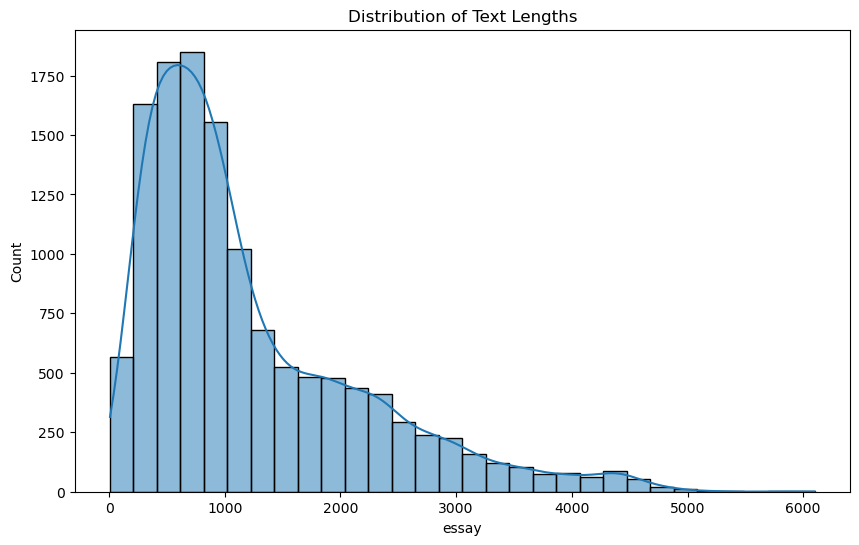

In [25]:
training_set['text_length'] =training_set.apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(training_set['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

## Word count in each row

In [27]:
training_set['word_count'] = training_set.apply(lambda x: len(str(x).split()))
print(training_set)

0              Dear local newspaper, I think effects computer...
1              Dear @CAPS1 @CAPS2, I believe that using compu...
2              Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3              Dear Local Newspaper, @CAPS1 I have found that...
4              Dear @LOCATION1, I know having computers has a...
                                     ...                        
12973          When you laugh, is @CAPS5 out of habit, or is ...
12974                                         Trippin' on fen...
12975           Many people believe that laughter can improve...
text_length    0        1875
1        2288
2        1541
3   ...
word_count     0              338
1              419
2       ...
Name: essay, Length: 12978, dtype: object


In [30]:
training_set['word_count']

0              338
1              419
2              279
3              524
4              465
              ... 
12973          817
12974          562
12975          467
text_length     27
word_count      27
Name: essay, Length: 12978, dtype: int64

# #Most frequent words using WordCloud

In [34]:
# Concatenate all the text from the 'text_column'

all_text = ' '.join(df['essay'].astype(str))


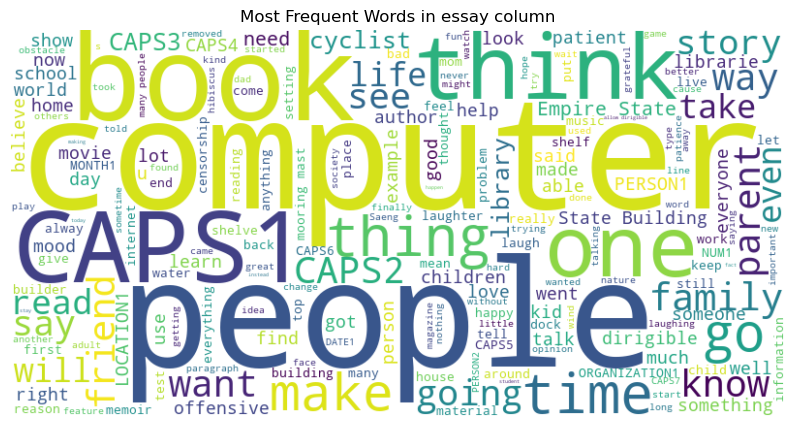

In [37]:
# Most frequent words using WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in essay column')
plt.show()

## counting unique word and adjectifs

In [ ]:
import spacy
from collections import Counter

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")


# Function to calculate unique word count
def calculate_unique_word_count(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Calculate unique words
    unique_words = set(token.text.lower() for token in doc if token.is_alpha)

    return len(unique_words)

# Function to count adjectives
def count_adjectives(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Count occurrences of adjectives
    adjectives = [token.text.lower() for token in doc if token.pos_ == "ADJ"]
    adjective_counts = Counter(adjectives)

    return adjective_counts

# Apply the functions to each row in the DataFrame
df['unique_word_count'] = df['essay'].apply(calculate_unique_word_count)
df['adjective_counts'] = df['essay'].apply(count_adjectives)

# Display the DataFrame with calculated metrics
print(df['unique_word_count'])


In [ ]:
data=df['adjective_counts']

In [11]:
# Création du DataFrame
df = pd.DataFrame(data)

# Fonction pour calculer la somme des valeurs dans le dictionnaire
sum_adjectives = lambda x: sum(x.values())

# Appliquer la fonction à chaque ligne
df['total_adjectives'] = df['adjective_counts'].apply(sum_adjectives)

# Afficher le résultat
print(df)

KeyError: 'adjective_counts'

In [47]:
df_transposed = df['adjective_counts'].apply(pd.Series).fillna(0).astype(int)

In [48]:
df_transposed

,dear,local,great,new,other,surprise,interesting,better,fresh,right,...,greenish,@num11,princess,@caps16,mirthful,lackadaisical,auxiliary,muh,coastal,rip
0,1,2,2,4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,0,0,1,1,5,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
12972,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12973,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12974,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
print(df['unique_word_count'])

0        157
1        186
2        140
3        224
4        194
        ... 
12971    299
12972    192
12973    337
12974    225
12975    216
Name: unique_word_count, Length: 12976, dtype: int64


## counting the number of @ referenced in each cell 

In [56]:

# Function to count "@" occurrences in a cell
def count_at_mentions(cell_text):
    return cell_text.count('@')

# Apply the function to each row in the DataFrame
df['at_mentions_count'] = df['essay'].apply(count_at_mentions)

# Display the DataFrame with the count of "@" mentions
print(df['at_mentions_count'])

0         5
1        10
2         7
3        41
4         4
         ..
12971    55
12972    32
12973    57
12974    20
12975    11
Name: at_mentions_count, Length: 12976, dtype: int64
